# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Outputs/cities.csv" # Converting raw data to CSV 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
print('''Beginning Data Retrieval     
-----------------------------''')

url = "http://api.openweathermap.org/data/2.5/weather?"
record_num = 0
set_num = 1
city_info = []

for city in cities:
    query_url = url + "appid=" + api_keys.api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        record_num += 1
        latitude = weather_json["coord"]["lat"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        city_info.append({"Name": city, "Latitude": latitude, "Temperature (F)": temperature, "Humidity (%)": humidity, 
                          "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})
        print(f"Processing Record {record_num} of Set {set_num} | {city}")
    
    except KeyError: 
        cities.remove(city)
        record_num = 0
        set_num += 1
        print("City not found. Skipping...")
        pass
    
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | sorong
City not found. Skipping...
Processing Record 1 of Set 2 | ushuaia
Processing Record 2 of Set 2 | yueyang
Processing Record 3 of Set 2 | bredasdorp
Processing Record 4 of Set 2 | lorengau
Processing Record 5 of Set 2 | punta arenas
Processing Record 6 of Set 2 | evanston
Processing Record 7 of Set 2 | coahuayana
Processing Record 8 of Set 2 | albany
City not found. Skipping...
Processing Record 1 of Set 3 | puerto madryn
Processing Record 2 of Set 3 | vaini
Processing Record 3 of Set 3 | busselton
Processing Record 4 of Set 3 | thinadhoo
Processing Record 5 of Set 3 | qaanaaq
Processing Record 6 of Set 3 | poso
Processing Record 7 of Set 3 | 

Processing Record 2 of Set 22 | ahipara
City not found. Skipping...
Processing Record 1 of Set 23 | baykit
Processing Record 2 of Set 23 | iranduba
Processing Record 3 of Set 23 | torbay
Processing Record 4 of Set 23 | ulladulla
Processing Record 5 of Set 23 | tuatapere
Processing Record 6 of Set 23 | luzhou
Processing Record 7 of Set 23 | banda aceh
Processing Record 8 of Set 23 | ponca city
Processing Record 9 of Set 23 | iquique
Processing Record 10 of Set 23 | cidreira
Processing Record 11 of Set 23 | abrau-dyurso
Processing Record 12 of Set 23 | bloomingdale
Processing Record 13 of Set 23 | sulangan
Processing Record 14 of Set 23 | ribeira grande
Processing Record 15 of Set 23 | libertador general san martin
Processing Record 16 of Set 23 | dudinka
Processing Record 17 of Set 23 | changji
Processing Record 18 of Set 23 | waingapu
Processing Record 19 of Set 23 | hovd
Processing Record 20 of Set 23 | muisne
Processing Record 21 of Set 23 | athabasca
City not found. Skipping...
Proc

Processing Record 7 of Set 39 | cap malheureux
Processing Record 8 of Set 39 | fraga
Processing Record 9 of Set 39 | mehamn
Processing Record 10 of Set 39 | mpulungu
Processing Record 11 of Set 39 | san jose
City not found. Skipping...
Processing Record 1 of Set 40 | buarcos
Processing Record 2 of Set 40 | altay
City not found. Skipping...
Processing Record 1 of Set 41 | veraval
Processing Record 2 of Set 41 | aksarka
Processing Record 3 of Set 41 | coquimbo
Processing Record 4 of Set 41 | flinders
Processing Record 5 of Set 41 | xichang
Processing Record 6 of Set 41 | naze
Processing Record 7 of Set 41 | oranjemund
Processing Record 8 of Set 41 | tabou
Processing Record 9 of Set 41 | nhamunda
Processing Record 10 of Set 41 | manuk mangkaw
City not found. Skipping...
Processing Record 1 of Set 42 | eureka
Processing Record 2 of Set 42 | vestmanna
Processing Record 3 of Set 42 | ust-nera
Processing Record 4 of Set 42 | vilhena
Processing Record 5 of Set 42 | gamba
City not found. Skippi

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_keys.api_key + "&q=London"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7a747b6466af06d9532f5ec5f6c6b8a1&q=London


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Create dataframe
weather_df = pd.DataFrame(city_info)

In [21]:
# Write to CSV 
weather_df.to_csv("Outputs/cities.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Output/cities.csv'

In [22]:
# Display the top 5-10 values of the dataframe
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,100,70,-23.12,rikitea,293.40,9.75
1,62,96,69.38,leningradskiy,278.80,0.92
2,86,73,-21.21,avarua,296.15,8.70
3,0,81,-33.59,port alfred,285.93,1.79
4,100,94,61.99,paamiut,279.60,7.08
5,90,93,60.79,bethel,285.51,9.80
6,100,81,62.23,klaksvik,282.15,4.60
7,0,87,-33.93,cape town,285.54,1.50
8,60,83,3.36,bonfim,298.10,1.74
9,75,93,62.45,yellowknife,281.05,2.10


In [23]:
# Filtering data to remove "outliers" (Values greater than 100%)
weather_df = weather_df[weather_df["Humidity (%)"] <= 100]
weather_df.head(10)

,Cloudiness (%),Humidity (%),Latitude,Name,Temperature (F),Wind Speed (mph)
0,100,70,-23.12,rikitea,293.40,9.75
1,62,96,69.38,leningradskiy,278.80,0.92
2,86,73,-21.21,avarua,296.15,8.70
3,0,81,-33.59,port alfred,285.93,1.79
4,100,94,61.99,paamiut,279.60,7.08
5,90,93,60.79,bethel,285.51,9.80
6,100,81,62.23,klaksvik,282.15,4.60
7,0,87,-33.93,cape town,285.54,1.50
8,60,83,3.36,bonfim,298.10,1.74
9,75,93,62.45,yellowknife,281.05,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

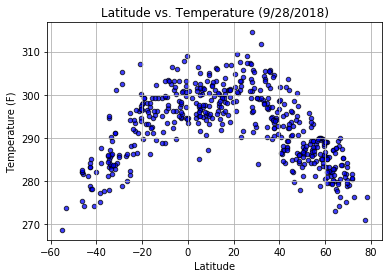

In [24]:
weather_df.plot.scatter(x = "Latitude", y = "Temperature (F)", color = "blue", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Temperature (9/28/2018)")
plt.savefig("Images/Latitude vs. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

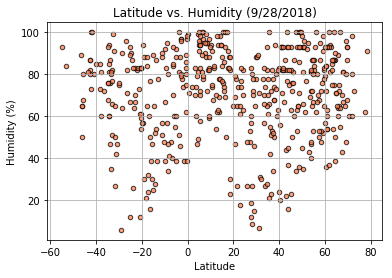

In [25]:
weather_df.plot.scatter(x = "Latitude", y = "Humidity (%)", color = "coral", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Humidity (9/28/2018)")
plt.savefig("Images/Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

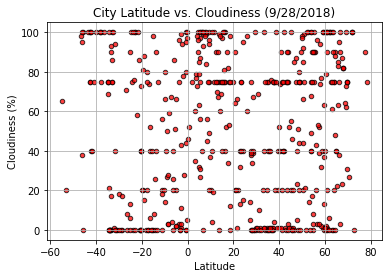

In [26]:
weather_df.plot.scatter(x = "Latitude", y = "Cloudiness (%)", color = "red", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (9/28/2018)")
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

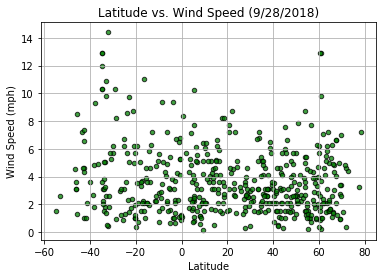

In [27]:
weather_df.plot.scatter(x = "Latitude", y = "Wind Speed (mph)", color = "green", 
                        alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("Latitude vs. Wind Speed (9/28/2018)")
plt.savefig("Images/Latitude vs. Wind Speed.png")
plt.show()